# Approach


1)Each column of the datasets were checked for any data inconsistency.

2)Required actions were taken for specific columns where data inconsistencies were found.

3)Different regression algorithms were used to build different models.

4) __RandomForestRegressor__ gave us the best model.So the .ipynb file contains only the random forest models.

5)Tuning of hyperparameters were required for random forest regressor to optimize the RMSLE value.

6)Best features were selected using VIF,RFE,forward elimnation,backward elimination,random forest and extra trees techniques. Features extracted using extra trees technique gave us the best model.

# Importing Librabries

In [184]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import various functions to perform regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

#importing metrics for tabulating the result
from sklearn.metrics import mean_squared_log_error

#setting the plot size using rcParams
plt.rcParams['figure.figsize'] = [15,8]

Importing the data

In [185]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Understanding the data

In [186]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


From the above display we can see that:

1)The 'Levy' column contains '-' symbol.We need to look into this column.

2)In the 'Doors' column there are month names which we need to remove.

3)In the 'MIleage' column there is 'km' written, we need to seperate this 'km' for model building purpose.

In [187]:
df_test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


From the above display we can see that:

1)The 'Levy' column contains '-' symbol.We need to look into this column.

2)In the 'Doors' column there are month names which we need to remove.

3)In the 'Mileage' column there is 'km' written, we need to seperate this 'km' for model building purpose.

4)We need to delete the 'Price' column as we need to predict it.

In [188]:
#Understanding the shape of the data
df.shape

(19237, 18)

We can see that there are 19237 records and 18 rows

In [189]:
#assigning the target variable
y=df['Price']

In [190]:
#Concatenting both the test and train datasets together so that we can perform all the rectification tasks on both the data together
import pandas as pd

# Drop the 'Price' column from both DataFrames
df = df.drop(['Price'], axis=1)
df_test = df_test.drop(['Price'], axis=1)

# Concatenate the DataFrames using pd.concat()
df_merge = pd.concat([df, df_test], ignore_index=True)

# Reset the index and drop the 'index' column
df_merge.reset_index(inplace=True, drop=True)


In [191]:
#checking the shape of the merged dataset
df_merge.shape

(27482, 17)

In [192]:
#checking the dtypes and Unique values
info = pd.DataFrame()
info['DataTypes'] = df_merge.dtypes
info['Unique_values'] = df_merge.nunique()
info

,DataTypes,Unique_values
ID,int64,26886
Levy,object,635
Manufacturer,object,68
Model,object,1981
Prod. year,int64,59
Category,object,11
Leather interior,object,2
Fuel type,object,7
Engine volume,object,112
Mileage,object,9977


We need to convert 'Mileage' column into float as we know that it is of float/integer datatype.

In [193]:
df_merge.describe(include='object')

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482
unique,635,68,1981,11,2,7,112,9977,4,3,3,2,16
top,-,HYUNDAI,Sonata,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,8273,5358,1557,12534,19926,14492,5587,1013,19296,18374,26173,25384,7196


In [194]:
df_merge.describe(include=np.number)

,ID,Prod. year,Cylinders,Airbags
count,2.748200e+04,27482.000000,27482.000000,27482.000000
mean,4.557857e+07,2010.912452,4.593734,6.563569
std,9.244972e+05,5.632865,1.413918,4.329256
min,2.074688e+07,1939.000000,1.000000,0.000000
25%,4.569808e+07,2009.000000,4.000000,4.000000
50%,4.577207e+07,2012.000000,4.000000,6.000000
75%,4.580197e+07,2015.000000,4.000000,12.000000
max,4.581665e+07,2020.000000,127.000000,16.000000


From the describe() function we can get the mean,count and quantiles values for numeric data and count,frequency of object type data. From the above displays it can be seen that there are no missing values.

# Rectifying the data

In [195]:
#removing the 'km' from the mileage column and converting it to float
df_merge['Mileage'] = pd.to_numeric(df_merge.Mileage.str.split(' ').str[0], downcast='float')

In [196]:
#replacing all the '0' values with the mean values of the 'Mileage' column
df_merge['Mileage'] = np.where(df_merge['Mileage'] == 0.0,df_merge['Mileage'].mean(),df_merge['Mileage'])

In [197]:
#checking the unique values of 'Doors' column
df_merge['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [198]:
#cleaning the Doors column
df_merge['Doors'] = np.where((df_merge['Doors'] == '04-May') | (df_merge['Doors'] == '02-Mar'), df_merge['Doors'].str.split('-').str[0],df_merge['Doors'])

In [199]:
#checking the unique values of 'Doors' column after cleaning
df_merge['Doors'].unique()

array(['04', '02', '>5'], dtype=object)

In [200]:
#checking the unique values of 'Levy' column after cleaning
df_merge['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [201]:
#converting the Levy column to float as it is the Tax 
df_merge['Levy'] = pd.to_numeric(df_merge['Levy'].replace('-', '0'), downcast='float')

In [202]:
#Replacing the 0 in the 'Levy' column with mean of that column
df_merge['Levy'] = np.where(df_merge['Levy'] == 0.0,df_merge['Levy'].mean(),df_merge['Levy'])

In [203]:
#checking the unique values in the 'Engine volume' column
df_merge['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [204]:
#We can see that there are some values with 'Turbo' and some values without 'Turbo'
#So we remove the word 'Turbo' from all records that have it
df_merge['Engine volume'] = pd.to_numeric(df_merge['Engine volume'].str.split(' ').str[0], downcast='float')

In [205]:
#Replacing the '0' in the 'Engine volume' column with the mean value of that column
df_merge['Engine volume']=np.where(df_merge['Engine volume'] == 0.0,df_merge['Engine volume'].mean(),df_merge['Engine volume'])

In [206]:
#Feature engineering the production year column
import datetime as dt
currt_time = dt.datetime.now()
df_merge['Prod. year'] = currt_time.year - df_merge['Prod. year'] 

In [207]:
#Checking the dataset after all the retification
df_merge.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,1399.000000,LEXUS,RX 450,14,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Left wheel,Silver,12
1,44731507,1018.000000,CHEVROLET,Equinox,13,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04,Left wheel,Black,8
2,45774419,636.172058,HONDA,FIT,18,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04,Right-hand drive,Black,2
3,45769185,862.000000,FORD,Escape,13,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04,Left wheel,White,0
4,45809263,446.000000,HONDA,FIT,10,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04,Left wheel,Silver,4


# Extrapolatory Data Analysis 

<function matplotlib.pyplot.show(close=None, block=None)>

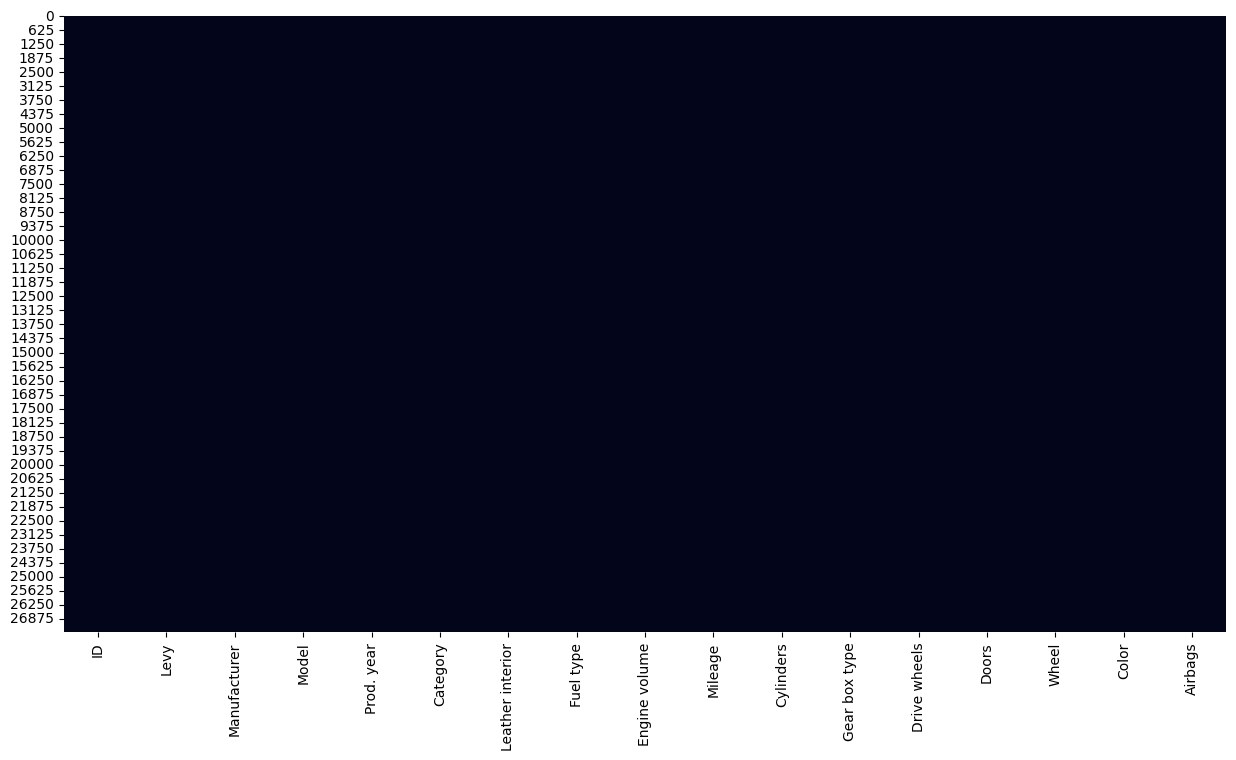

In [208]:
sns.heatmap(df_merge.isnull(),cbar=False)
plt.show

We can see that 'Engine volume' is having high correlation with 'Cylinders' and 'Levy' columns. 

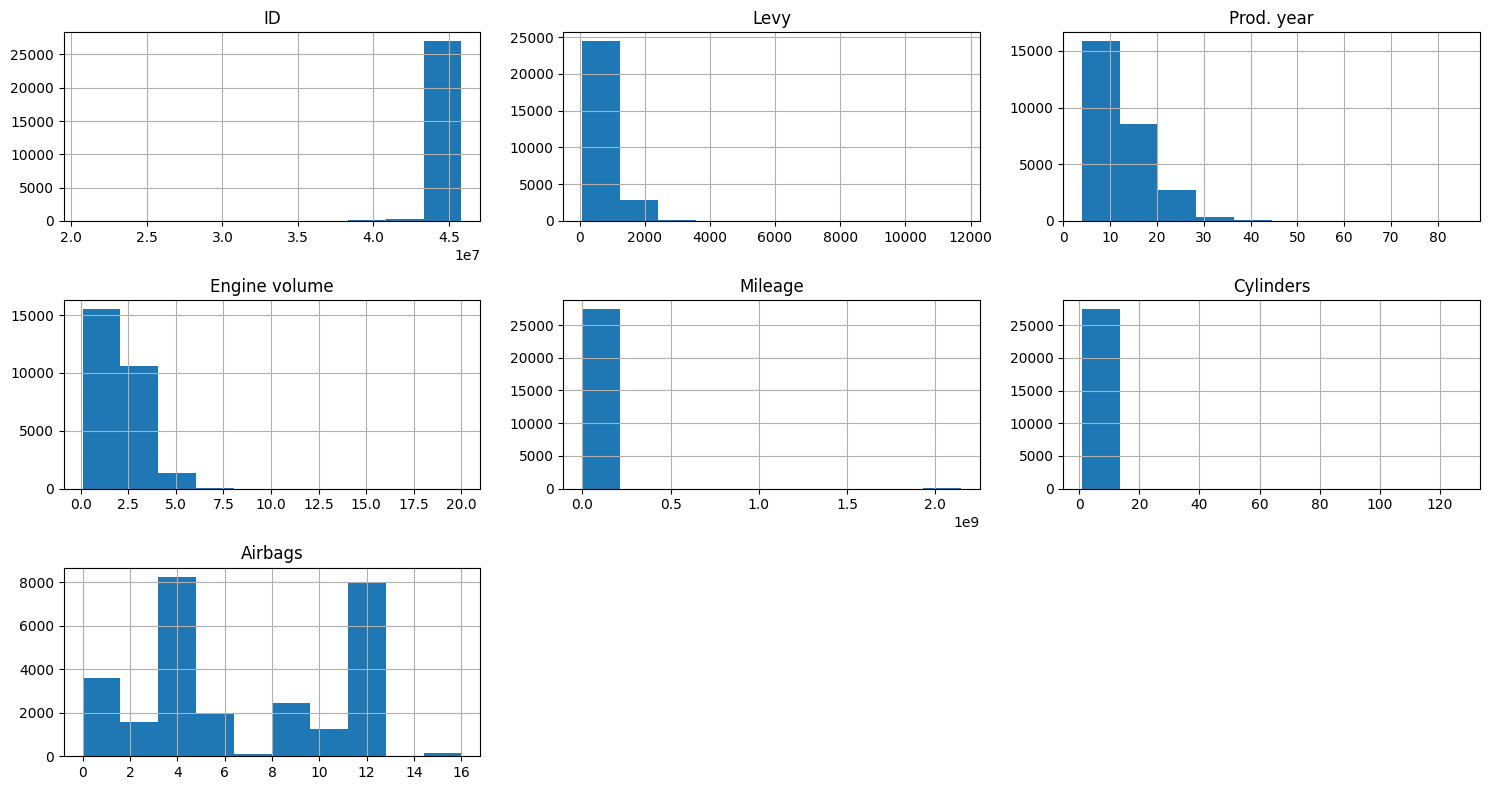

In [209]:
#distribution of numeric variables
df_merge.hist()
plt.tight_layout()
plt.show()

We can see that 'Prod. year','Levy' and 'Engine volume' columns are right skewed.

In [210]:
#shapiro test to check the skewness of the target variable
from scipy.stats import shapiro
x = shapiro(y)
if x[1] <= 0:
    print('Negatively skewed')
else:
    print('Positively Skewed')
  

Negatively skewed


In [211]:
#As from the shapiro test we can see that 'Price' column is negatively skewed we need to normlize it


# Building the model

In [212]:
categ = df_merge.select_dtypes(include='object')
num = df_merge.select_dtypes(include = np.number)

In [213]:
#getting dummies for the categorical variables
cat_dummies = pd.get_dummies(categ,drop_first=True)

In [214]:
#creating the final dataset
df_final = pd.concat([num,cat_dummies], axis=1)

In [215]:
#checking the shape of the final dataset
df_final.shape

(27482, 2094)

In [216]:
#segregating the training and test data before model building
train_data = df_final.iloc[:19237]
train_data.shape

(19237, 2094)

In [217]:
test_data = df_final.iloc[19237:]
test_data.shape

(8245, 2094)

In [218]:
#splitting the data into test and train
X = train_data
Y=y

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=10)


In [138]:
#Randomized Search CV for searching the best parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [139]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [46]:
rf_model = RandomForestRegressor()

In [47]:
rf_random_model = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [48]:
rf_random_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  21.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  20.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  18.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  18.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  18.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  39.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  39.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [49]:
#getting the best parameters
rf_random_model.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

#  Feature selection using  extra tree regressor

Since we need to find features to train the model so that it neither gets underfitted or overfitted, we use feature selection technique.The best feature selection technique that worked for this problem statement is using extra tree regressor.

In [219]:
reg= ExtraTreesRegressor()
reg.fit(X_train,y_train)
ExtraTreesRegressor()

ExtraTreesRegressor()

In [220]:
#finding important features
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)

In [221]:
pd.DataFrame(feat_importances.nlargest(11)).index

Index(['Prod. year', 'Color_Blue', 'ID', 'Airbags', 'Mileage', 'Model_Combo',
       'Doors_04', 'Fuel type_Diesel', 'Color_White', 'Levy',
       'Model_G 65 AMG 63AMG'],
      dtype='object')

In [222]:
#instantiating the randomforest regressor using the best parameters
mod4 = RandomForestRegressor(n_estimators= 1000, max_depth= 25,
 max_features= 'sqrt',
 min_samples_leaf=1,
 min_samples_split = 2
 )

In [223]:
X1 = train_data[['Airbags','Mileage','Prod. year', 'Gear box type_Tiptronic',
       'Levy', 'Leather interior_Yes', 'Manufacturer_HYUNDAI',
       'Fuel type_Hybrid', 'Engine volume', 'Fuel type_Diesel']]
y1=y



In [224]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [225]:
colms=[ 'Gear box type_Tiptronic','Leather interior_Yes', 'Manufacturer_HYUNDAI',
       'Fuel type_Hybrid', 'Fuel type_Diesel']

In [226]:
X1

,Airbags,Mileage,Prod. year,Gear box type_Tiptronic,Levy,Leather interior_Yes,Manufacturer_HYUNDAI,Fuel type_Hybrid,Engine volume,Fuel type_Diesel
0,12,186005.0,14,False,1399.000000,True,False,True,3.5,False
1,8,192000.0,13,True,1018.000000,False,False,False,3.0,False
2,2,200000.0,18,False,636.172058,False,False,False,1.3,False
3,0,168966.0,13,False,862.000000,True,False,True,2.5,False
4,4,91901.0,10,False,446.000000,True,False,False,1.3,False
...,...,...,...,...,...,...,...,...,...,...
19232,5,300000.0,25,False,636.172058,True,False,False,2.0,False
19233,8,161600.0,13,True,831.000000,True,True,False,2.4,False
19234,4,116365.0,14,False,836.000000,True,True,False,2.0,True
19235,4,51258.0,17,False,1288.000000,True,False,False,2.0,True


In [227]:
for i in colms:
    X1[i]=le.fit_transform(X1[i])

In [228]:
X1

,Airbags,Mileage,Prod. year,Gear box type_Tiptronic,Levy,Leather interior_Yes,Manufacturer_HYUNDAI,Fuel type_Hybrid,Engine volume,Fuel type_Diesel
0,12,186005.0,14,0,1399.000000,1,0,1,3.5,0
1,8,192000.0,13,1,1018.000000,0,0,0,3.0,0
2,2,200000.0,18,0,636.172058,0,0,0,1.3,0
3,0,168966.0,13,0,862.000000,1,0,1,2.5,0
4,4,91901.0,10,0,446.000000,1,0,0,1.3,0
...,...,...,...,...,...,...,...,...,...,...
19232,5,300000.0,25,0,636.172058,1,0,0,2.0,0
19233,8,161600.0,13,1,831.000000,1,1,0,2.4,0
19234,4,116365.0,14,0,836.000000,1,1,0,2.0,1
19235,4,51258.0,17,0,1288.000000,1,0,0,2.0,1


In [229]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.3, random_state=10)

In [230]:
#fitting the model
model = mod4.fit(X1_train, y1_train)

In [231]:
#predicting the data
y_predict=model.predict(X1_test)

In [232]:
#calculating the RMLSE score
RMLSE=np.sqrt(mean_squared_log_error(np.exp(y1_test),np.exp(y_predict)))

ValueError: Input contains infinity or a value too large for dtype('float64').

In [ ]:
#Printing the RMLSE score
RMLSE

0.9757832892236978

In [233]:
import pickle
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [103]:
arr=np.array([['10','7500','20','1','636','1','0','0','1.8','1']])

In [104]:
hi=model.predict(arr)

In [100]:
hi

array([8.86630259])

In [93]:
y1

0         9.497622
1         9.718422
2         9.043932
3         8.190632
4         9.369564
           ...    
19232     9.043932
19233     9.660205
19234    10.169997
19235     8.581294
19236     6.152733
Name: Price, Length: 19237, dtype: float64

In [105]:
X1_test

,Airbags,Mileage,Prod. year,Gear box type_Tiptronic,Levy,Leather interior_Yes,Manufacturer_HYUNDAI,Fuel type_Hybrid,Engine volume,Fuel type_Diesel
1770,11,75621.0,10,0,636.172058,1,0,1,1.8,0
639,0,139363.0,13,0,1451.000000,1,0,0,4.4,0
15934,10,100000.0,13,1,636.172058,0,0,0,2.5,0
10197,12,130000.0,21,1,636.172058,1,0,0,5.0,0
936,1,100000.0,24,0,636.172058,0,0,0,3.2,0
...,...,...,...,...,...,...,...,...,...,...
7972,12,78194.0,10,0,639.000000,1,0,0,2.0,1
10314,0,49272.0,9,0,308.000000,1,0,1,1.5,0
17442,0,115000.0,10,0,636.172058,0,0,0,1.6,0
5433,12,85000.0,12,1,781.000000,1,0,0,2.5,0


# Finding best features using random forest regressor

In [59]:
mod3 = RandomForestRegressor(n_estimators= 1000, max_depth= 25,
 max_features= 'sqrt',
 min_samples_leaf=1,
 min_samples_split = 2
 )

In [60]:
model_random = mod3.fit(X_train, y_train)

In [61]:
feat_importances = pd.Series(model_random.feature_importances_, index=X_train.columns)

In [62]:
pd.DataFrame(feat_importances.nlargest(50)).index

Index(['Mileage', 'ID', 'Airbags', 'Prod. year', 'Levy',
       'Gear box type_Tiptronic', 'Engine volume', 'Fuel type_Hybrid',
       'Leather interior_Yes', 'Fuel type_Diesel', 'Cylinders',
       'Manufacturer_HYUNDAI', 'Fuel type_Petrol', 'Color_White',
       'Drive wheels_Front', 'Category_Sedan', 'Color_Black', 'Color_Silver',
       'Color_Grey', 'Category_Jeep', 'Wheel_Right-hand drive',
       'Category_Hatchback', 'Model_Santa FE', 'Gear box type_Variator',
       'Model_FIT', 'Manufacturer_SSANGYONG', 'Manufacturer_TOYOTA',
       'Model_E 350', 'Manufacturer_HONDA', 'Drive wheels_Rear', 'Color_Blue',
       'Model_Prius', 'Model_H1', 'Gear box type_Manual', 'Manufacturer_LEXUS',
       'Manufacturer_MERCEDES-BENZ', 'Model_Tucson', 'Fuel type_LPG',
       'Manufacturer_BMW', 'Model_Escape', 'Model_Camry', 'Model_RX 450',
       'Doors_04', 'Model_ML 350', 'Color_Red', 'Manufacturer_NISSAN',
       'Model_Sonata', 'Category_Minivan', 'Model_Actyon', 'Model_REXTON'],
      dt

In [63]:
X2=train_data[['Airbags', 'Mileage', 'Prod. year', 'Gear box type_Tiptronic',
       'Leather interior_Yes', 'Levy', 'Fuel type_Diesel', 'Engine volume',
       'Manufacturer_HYUNDAI', 'Fuel type_Hybrid', 'Color_White',
       'Color_Black', 'Drive wheels_Front', 'Model_FIT', 'Color_Grey',
       'Color_Silver', 'Cylinders', 'Wheel_Right-hand drive', 'Category_Sedan',
       'Manufacturer_TOYOTA', 'Category_Jeep', 'Gear box type_Variator',
       'Manufacturer_SSANGYONG', 'Fuel type_Petrol', 'Drive wheels_Rear',
       'Model_Prius', 'Color_Blue', 'Category_Hatchback']]
Y2=y

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,Y2, test_size=0.3, random_state=10)

In [64]:
model1 = mod4.fit(X2_train, y2_train)

In [65]:
y_pred=model1.predict(X2_test)

In [66]:
RMLSE1=np.sqrt(mean_squared_log_error(np.exp(y2_test),np.exp(y_pred)))

In [67]:
RMLSE1

0.8447049902423515

In [69]:
X2_test

,Airbags,Mileage,Prod. year,ID,Gear box type_Tiptronic,Leather interior_Yes,Levy,Fuel type_Diesel,Engine volume,Manufacturer_HYUNDAI,...,Category_Sedan,Manufacturer_TOYOTA,Category_Jeep,Gear box type_Variator,Manufacturer_SSANGYONG,Fuel type_Petrol,Drive wheels_Rear,Model_Prius,Color_Blue,Category_Hatchback
1770,11,75621.0,9,45687222,False,True,636.172058,False,1.8,False,...,False,True,False,False,False,False,False,True,True,True
639,0,139363.0,12,45620684,False,True,1451.000000,False,4.4,False,...,True,False,False,False,False,True,False,False,False,False
15934,10,100000.0,12,45789095,True,False,636.172058,False,2.5,False,...,True,False,False,False,False,True,False,False,False,False
10197,12,130000.0,20,45796657,True,True,636.172058,False,5.0,False,...,True,False,False,False,False,True,False,False,False,False
936,1,100000.0,23,45808805,False,False,636.172058,False,3.2,False,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7972,12,78194.0,9,45654463,False,True,639.000000,True,2.0,False,...,True,False,False,False,False,False,False,False,False,False
10314,0,49272.0,8,45656690,False,True,308.000000,False,1.5,False,...,True,False,False,False,False,False,False,False,True,False
17442,0,115000.0,9,45795853,False,False,636.172058,False,1.6,False,...,True,False,False,False,False,True,False,False,False,False
5433,12,85000.0,11,45806705,True,True,781.000000,False,2.5,False,...,True,False,False,False,False,True,False,False,False,False
